---
# Avaliação de Risco de Crédito
---

Este é um projeto que tem como principal objetivo a análise e avaliação de risco de credito, realizado no conjunto de dados de [German Credit Data](https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)).

O problema central e análise de crédito dos clientes do banco, que são classificados por `1` igual a um bom crédito e `0` igual a crédito ruim. Com base nos dados é possível encontrar um padrão por meio de um algoritmo de aprendizagem supervisionada (tratando-se básicamente de um problema de classificação). Por meio dos resultados auferidos por esta análise, a área de crédito do banco teria um ponto de partida para sua tomada de decisão sobre conceder ou não crédito aos seus clientes.

Existem 21 atributos no dataset, sendo que o objetivo principal e classificar a variável categórica `credit_rating`:

1. `credit_rating`: Rating de crédito, Qualitativa ('Bom' = 1, 'Ruim' = 0)

2. `account_balance`: Saldo da conta, Qualitativa ('Não possui conta' = 1, '0 à 200 DM' = 2, '200 à acima' = 3)

3. `credit_duration_months`: Duração de meses do crédito (Quantitativa)

4. `previous_credit_payment_status`: Status de pagamentos anteriores, Qualitativa ('Não pago/atraso' = 1, 'Pago' = 2, 'Créditos em outros bancos' = 3)

5. `credit_purpose`: Objetivo do crédito, Qualitativa ('Carro Novo' = 1, 'Carro Usado' = 2, 'Consumo' = 3, 'Outros Propósitos' = 4)

6. `credit_amount`: Valor Total de Crédito (Quantitativa)

7. `savings`: Poupança, Qualitativa ('Nenhum' = 1, 'Abaixo de 100 DM' = 2, '100 à 1000' = 3, 'Acima de 1000' = 4
    
8. `employment_duration`: Duração do emprego, Qualitativa ('0 à 1 ano' = 1, '1 à 4 anos' = 2, '4 à 7 anos' = 3, 'Acima de 7 anos' = 4

9. `installment_rate`: Taxa do empréstimo, Qualitativa ('Acima dos 35%' = 1, '25% à 35%' = 2, '20% à 25%' = 3, 'Abaixo dos 20%' = 4

10. `marital_status`: Estado Cívil, Qualitativa ('Masculino Solteiro' = 1, 'Masculino Casado' = 3, 'Feminino Solteira' = 4

11. `guarantor`: Fiador, Qualitativa ('Nenhum' = 1, 'Fiador' = 2)
    
12. `residence_duration`: Duração no Endereço Atual, Qualitativa ('Menos 1 ano' = 1, '1 à 4 anos' = 2, '4 à 7 anos' = 3, 'Acima de 7 anos' = 4

13. `current_assets`: Ativos correntes, Qualitativa ('Nenhum' = 1, 'Carro' = 2, 'Seguro de vida' = 3, 'Imóveis' = 4)

14. `age`: Idade (Quantitativa)
    
15. `other_credits`: Outros créditos, Qualitativa ('Outros bancos' = 1, 'Nenhum' = 2)

16. `apartment_type`: Tipo de residência, Qualitativa ('Gratuito' = 1, 'Aluguel' = 2, 'Próprio' = 3)

17. `bank_credits`: Créditos no banco, Qualitativa ('1' = 1, '2 à 6' = 2)

18. `occupation`: Ocupação, Qualitativa ('Desempregado, não qualificado' = 1, 'Desempregado Não Qualificado' = 2, 'Empregado Qualificado' = 3, 'Gestor' = 4)

19. `dependents`: Dependentes, Qualitativa ('3 ou mais' = 1, 'Menos de 3' = 2)

20. `telephone`: Telefone, Qualitativa ('Sim' = 1, 'Não' = 2)

21. `foreign_worker`: Trabalhador estrangeiro, Qualitativa ('Sim' = 1, 'Não' = 2)

In [1]:
# Importando as bibliotecas utilizadas na análise
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Definindo o estilo dos gráficos
%matplotlib inline
sns.set_style('ticks')

# Ignorando os avisos aprensentados no notebook
warnings.filterwarnings("ignore")

In [2]:
# Carregando o dataset
df = pd.read_csv('Credit-Risk-Analysis/credit_dataset.csv')

# Observando o tipo de cada variável e a sua quantidade de informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
credit_rating                     1000 non-null int64
account_balance                   1000 non-null int64
credit_duration_months            1000 non-null int64
previous_credit_payment_status    1000 non-null int64
credit_purpose                    1000 non-null int64
credit_amount                     1000 non-null int64
savings                           1000 non-null int64
employment_duration               1000 non-null int64
installment_rate                  1000 non-null int64
marital_status                    1000 non-null int64
guarantor                         1000 non-null int64
residence_duration                1000 non-null int64
current_assets                    1000 non-null int64
age                               1000 non-null int64
other_credits                     1000 non-null int64
apartment_type                    1000 non-null int64
bank_credits                  

In [3]:
# Observando as 5 primeiras linhas do dataset
df.head()

,credit_rating,account_balance,credit_duration_months,previous_credit_payment_status,credit_purpose,credit_amount,savings,employment_duration,installment_rate,marital_status,...,residence_duration,current_assets,age,other_credits,apartment_type,bank_credits,occupation,dependents,telephone,foreign_worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


Podemos obeservar que o dataset é pequeno e possui apenas **1000 linhas**. Além disso podemos perceber que as variáveis que deveriam ser categóricas são do tipo **int64**, vamos transformar estes atributos para o tipo **category** para que se torne mais facil de trabalhar com os mesmos daqui em diante.

In [4]:
# Selecionando as variáveis
cat_vars = ['credit_rating', 'account_balance', 'previous_credit_payment_status',
            'credit_purpose', 'savings', 'employment_duration', 'installment_rate',
            'marital_status', 'guarantor', 'residence_duration', 'current_assets',
            'other_credits', 'apartment_type', 'bank_credits', 'occupation',
            'dependents', 'telephone', 'foreign_worker']

# transformando as variáveis para 'category'
for i in cat_vars:
    df[cat_vars] = df[cat_vars].astype('category')

Pronto, agora podemos plotar os gráficos das variáveis categóricas e assim, olhar mas de perto seus valores. Vamos começar pela variável target `credit_rating`.

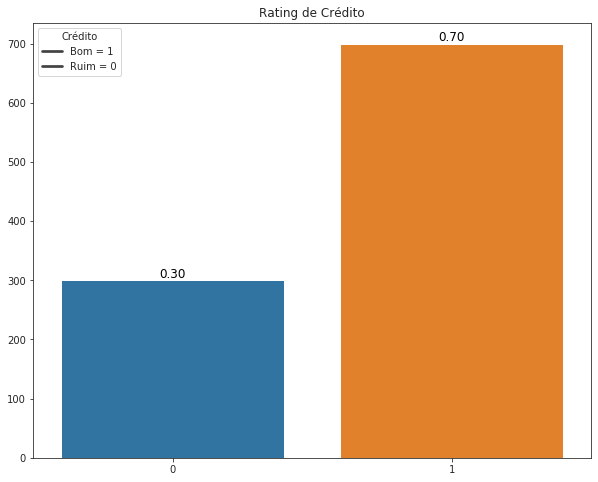

In [5]:
# Barplot da variável Rating de Crédito
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=df['credit_rating'].value_counts().index,
                 y=df['credit_rating'].value_counts().values, 
                 data=df)

total = float(len(df))

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height, '{:1.2f}'.format(height/total), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.legend(title='Crédito', loc='best', labels=['Bom = 1', 'Ruim = 0'])
plt.title('Rating de Crédito')
plt.show()

É bem percetível que a variável alvo está **desbalanceanda** (neste caso em específico se trata de um **over sample**), isso é um problema, pois, ao criar um modelo para tentar avaliar o risco de crédito o mesmo tenderá a prever mais uma classe do que a outra. Porém vamos resolver esse problema mais tarde agora vamos continuar a explorar as demais atributos qualitativos.

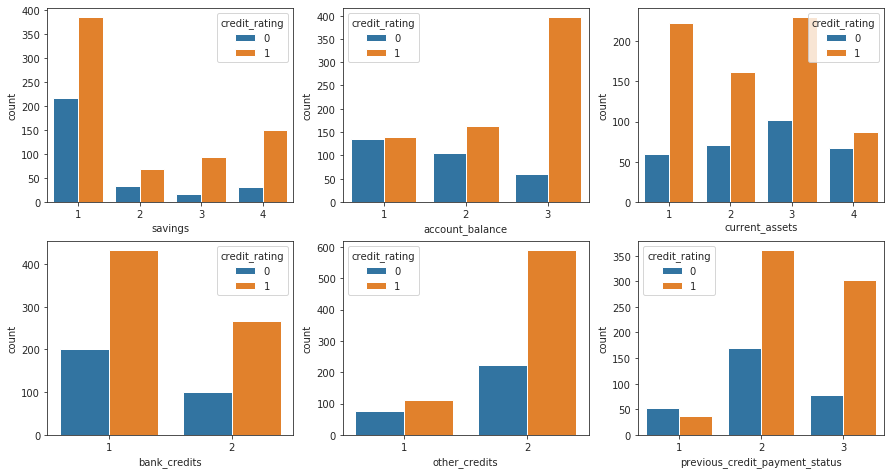

In [6]:
plt.figure(figsize=(15,25))

plt.subplot(6,3,1)
sns.countplot(x='savings', hue='credit_rating', data=df)

plt.subplot(6,3,2)
sns.countplot(x='account_balance', hue='credit_rating', data=df)

plt.subplot(6,3,3)
sns.countplot(x='current_assets', hue='credit_rating', data=df)

plt.subplot(6,3,4)
sns.countplot(x='bank_credits', hue='credit_rating', data=df)

plt.subplot(6,3,5)
sns.countplot(x='other_credits', hue='credit_rating', data=df)

plt.subplot(6,3,6)
sns.countplot(x='previous_credit_payment_status', hue='credit_rating', data=df)

plt.show()

Os gráficos de barras podem mostrar algumas coisas interessantes a respeito das variáveis. No caso o atributo `savings` **mais de 50%** das pessoas que pegaram empréstimos não possuiam nenhum tipo de poupança sendo que destes.

A variável `account_balance` para a maioria dos empréstimos realizados são de pessoas que um saldo na conta de **acima de 200 DM** enquanto o restante possui um saldo bancário **0 à 200** sendo estes a maioria das pessoas que possui um crédito ruim no banco.

Dentre os ativos mais valiosos dos clientes `current_assets` **33.4%** é seguro de seguro de vida, sendo que quase **um terço** dos clientes não possui nenhum ativo corrente.

Os créditos possuidos no banco `bank_credits` cerca de **2 terços** dos clientes presentes na base de dados possuem **pelo menos 1 tipo de crédito** enquanto os restante dos clientes **possuem mais de um**.

Já outros tipos de créditos em outro bancos e estabelecimentos **a grande maioria não possui qualquer outro tipo de crédito** `other_credits`.

Enquanto o atributo `previous_credit_payment_status` status de pagamento anteriores, **mais da metade dos pagamentos de clientes** já estão pagos **53%**.

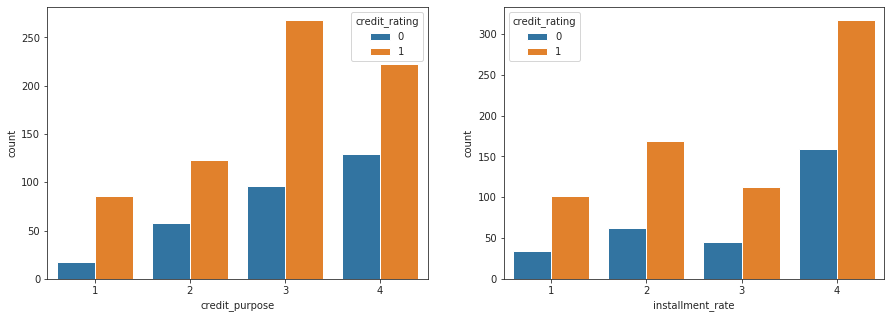

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.countplot(x='credit_purpose', hue='credit_rating', data=df)

plt.subplot(1,2,2)
sns.countplot(x='installment_rate', hue='credit_rating', data=df)

plt.show()

Dando sequência nos gráficos das variáveis qualitativas. Agora com os atributos `credit_purpose` onde **28%** tem o proposito de compra de um veículo usado ou novo, a grande maioria dos emprestimos feitos pelos clientes, cerca de **um terço** tem como destino o **consumo** enquanto os os restante são classificados com outros tipos.

Já as taxas das parcelas `installment_rate` cerca da metade **47.5%** dos clientes possuem taxas **abaixo de 20%** em suas prestações, enquanto os demais possuem taxas **de 20% à acima de 35%**.

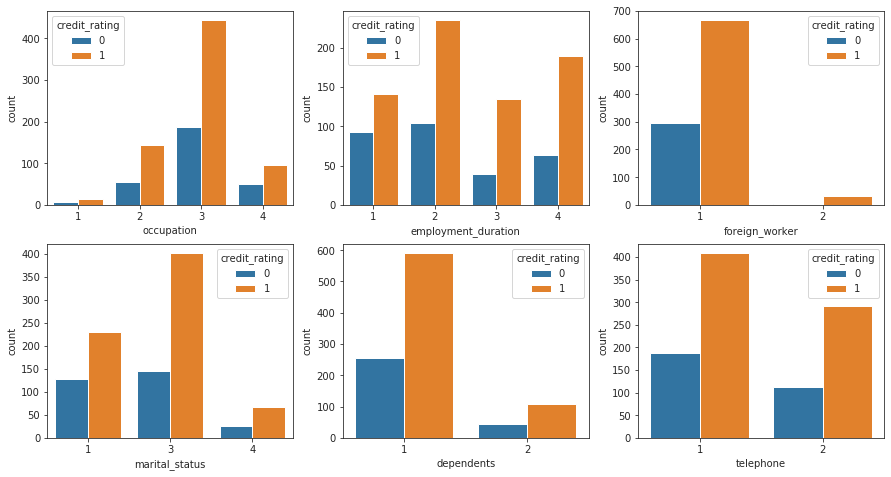

In [8]:
plt.figure(figsize=(15,25))

plt.subplot(6,3,1)
sns.countplot(x='occupation', hue='credit_rating', data=df)

plt.subplot(6,3,2)
sns.countplot(x='employment_duration', hue='credit_rating', data=df)

plt.subplot(6,3,3)
sns.countplot(x='foreign_worker', hue='credit_rating', data=df)

plt.subplot(6,3,4)
sns.countplot(x='marital_status', hue='credit_rating', data=df)

plt.subplot(6,3,5)
sns.countplot(x='dependents', hue='credit_rating', data=df)

plt.subplot(6,3,6)
sns.countplot(x='telephone', hue='credit_rating', data=df)

plt.show()

Em relação as ocupações dos clientes (variável preditora `occupation`) em sua maioria se declaram como **empregrados especializados, 63%**, cerca de **20%** deles são **residentes não especializados**, outros **15% são executivos** e o restante está **desempregado**.

A duração no emprego atual `employment_duration` **40%** destes estão entre **1 à 4 anos** no emprego atual e **30% estão à mais de 7 anos**.

O atributo `foregein_worker` trabalhador estrangeiro, quase todos os clientes que solicitaram créditos mesmo aqueles que possuem crédito ruim são **trabalhadores residentes 96%** sendo o restante em torno de **4% são trabalhadores estrangeiros**.

Quanto ao estado cívil `marital_status` mais da metade dos empréstimos concedidos são para pessoas do **sexo masculino casados 54%**, **36% masculino solteiro** e apenas uma pequena fração de **9% são pessoas do sexo feminino**.

A variável `dependents` cerca de **84% dos clientes possuem 3 ou mais dependentes** enquanto o **15%** possuem **apenas 1**

Em `telephone` cerca de **60% dos clientes não possuem telefone** enquanto apenas **40% possui**.

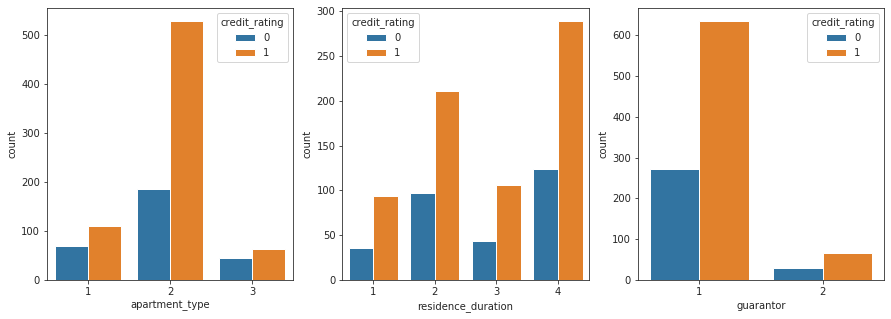

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
sns.countplot(x='apartment_type', hue='credit_rating', data=df)

plt.subplot(1,3,2)
sns.countplot(x='residence_duration', hue='credit_rating', data=df)

plt.subplot(1,3,3)
sns.countplot(x='guarantor', hue='credit_rating', data=df)

plt.show()

Agora a respeito do tipo de residências dos clientes do banco `apartament_type` **17% dos clientes possuem residências gratuitas**, **10% possuem morádias próprias** e cerca de **70% moram em residências alugadas**.

Referente ao tempo que os clientes estão nas suas respectivas residências `residence_duration` a grande maioria **41%** está a **mais de 7 anos** na mesma residência, **30%** esta entre **1 a 4 anos**, **14%** estão entre **4 a 7 anos** e os demais estão em torno de até **1 ano** na mesma residência.

A variável `gurantor` dos clientes presentes nesta base de dados do banco, cerca de **90% possuem fiador**, enquanto os **10% restantes não possuem**. 

Agora para tornar as análises posteriores mais faceis vamos transformar as variáveis categóricas em variáveis *dummies* para poder escolher e aplicar os algoritmos de classificação. As variáveis *dummies* permitiram captar as diferenças do valor esperado entre as categorias.

In [10]:
# Selecionando as variáveis categóricas
cat_vars = ['account_balance', 'previous_credit_payment_status','credit_purpose',
            'savings', 'employment_duration', 'installment_rate','marital_status',
            'guarantor', 'residence_duration', 'current_assets','other_credits',
            'apartment_type', 'bank_credits', 'occupation','dependents', 'telephone',
            'foreign_worker']

# Separando as variáveis e as transformando as variáveis selecionadas em variáveis dummies
dummies_vars = pd.get_dummies(df[cat_vars])

# Observando as novas variáveis criadas
dummies_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 52 columns):
account_balance_1                   1000 non-null uint8
account_balance_2                   1000 non-null uint8
account_balance_3                   1000 non-null uint8
previous_credit_payment_status_1    1000 non-null uint8
previous_credit_payment_status_2    1000 non-null uint8
previous_credit_payment_status_3    1000 non-null uint8
credit_purpose_1                    1000 non-null uint8
credit_purpose_2                    1000 non-null uint8
credit_purpose_3                    1000 non-null uint8
credit_purpose_4                    1000 non-null uint8
savings_1                           1000 non-null uint8
savings_2                           1000 non-null uint8
savings_3                           1000 non-null uint8
savings_4                           1000 non-null uint8
employment_duration_1               1000 non-null uint8
employment_duration_2               1000 non-null uint

In [11]:
# Observando o novo dataset com as variáveis dummies
dummies_vars.head()

,account_balance_1,account_balance_2,account_balance_3,previous_credit_payment_status_1,previous_credit_payment_status_2,previous_credit_payment_status_3,credit_purpose_1,credit_purpose_2,credit_purpose_3,credit_purpose_4,...,occupation_1,occupation_2,occupation_3,occupation_4,dependents_1,dependents_2,telephone_1,telephone_2,foreign_worker_1,foreign_worker_2
0,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,1,1,0,1,0
2,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
3,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,1,0,0,1
4,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,0,1


Agora vamos continuar a análise exploratória dos dados, porém, nas variáveis quantitativas. No dataset existem apenas 3 atributos quantitivos numericos, sendo eles:

1. Duração de crédito por mês (`credit_duration_months`);

2. Valor total do crédito (`credit_amount`); 

3. Idade (`age`).
    
Vamos explora-los através de graficos e alguns resumos estatísticos.

In [12]:
# Resumo estatístico das variáveis quantitativas
quantitative_col = df[['credit_duration_months', 'credit_amount', 'age']]
quantitative_col.describe()

,credit_duration_months,credit_amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


<Figure size 1080x720 with 0 Axes>

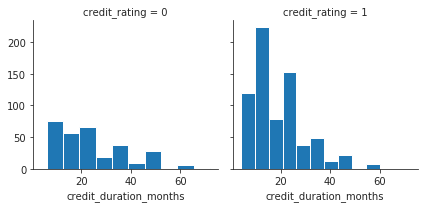

In [13]:
# Comparação dos histogramas de bons e maus credores ('credit_duration_months')
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col='credit_rating', margin_titles=True)
g.map(plt.hist, 'credit_duration_months')
plt.show()

<Figure size 1080x720 with 0 Axes>

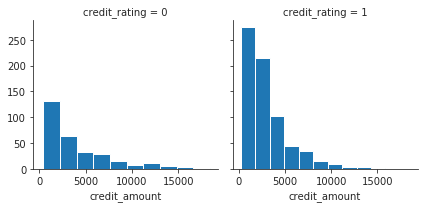

In [14]:
# Comparação dos histogramas de bons e maus credores ('credit_amount')
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col='credit_rating', margin_titles=True)
g.map(plt.hist, 'credit_amount')
plt.show()

<Figure size 1080x720 with 0 Axes>

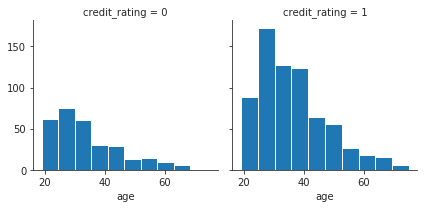

In [15]:
# Comparação dos histogramas de bons e maus credores ('Age')
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col='credit_rating', margin_titles=True)
g.map(plt.hist, 'age')
plt.show()

<Figure size 1440x1080 with 0 Axes>

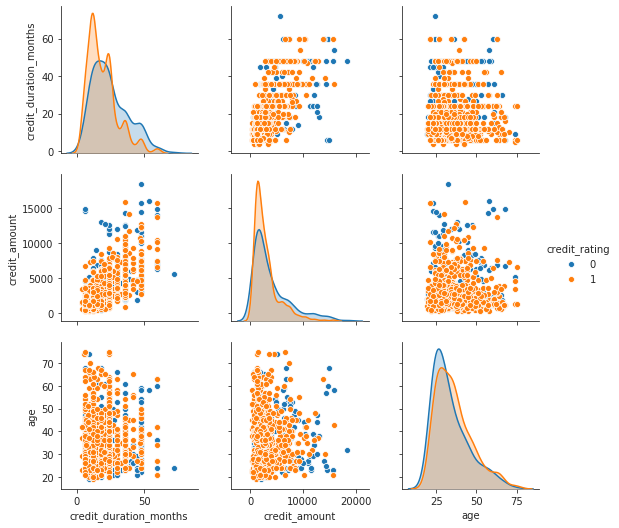

In [16]:
# Visualizando as relações entre as variáveis quantitativas através de gráfico dispersão 
plt.figure(figsize=(20, 15))
sns.pairplot(df, vars=['credit_duration_months', 'credit_amount', 'age'], 
             hue='credit_rating', diag_kind="kde")
plt.show()

Pelo último gráfico e possível perceber uma certa relação entre as variáveis quantitativas, além de, elas parecerem possuir certa **assimétria**, algo que pode atrapalhar futuras análises nos dados e também alguns algoritmos de classificação podem retornar resultados não muito satisfatórios.

Porém antes de passar para uma análise mais aprofundada na **assimétria** desses atributos, vamos fazer um pequeno processo de *feature engineering*, onde, com as variáveis quantitativas já existentes criaremos nos variavéis que podem trazerem melhores resultados nos modelos que serão treinados mais adiante.

In [17]:
# Criando a nova variável 'amount_per_age', Quantidade do empréstimo por idade
df['amount_per_age'] = df['credit_amount'] / df['age']

<Figure size 1080x720 with 0 Axes>

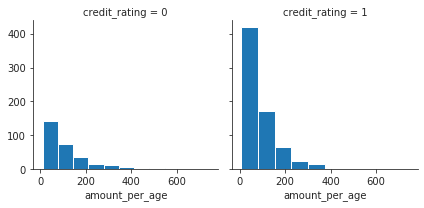

In [18]:
# Comparação dos histogramas de bons e maus credores ('amount_per_age')
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col='credit_rating', margin_titles=True)
g.map(plt.hist, 'amount_per_age')
plt.show()

In [19]:
# Criando a nova variável 'amount_per_months', Quantidade do empréstimo por meses
df['amount_per_months'] = df['credit_amount'] / df['credit_duration_months']

<Figure size 1080x720 with 0 Axes>

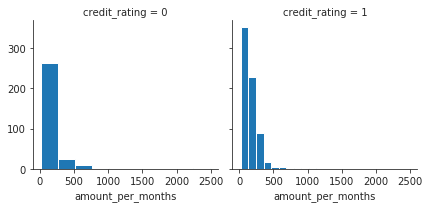

In [20]:
# Comparação dos histogramas de bons e maus credores ('amount_per_months')
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col='credit_rating', margin_titles=True)
g.map(plt.hist, 'amount_per_months')
plt.show()

In [21]:
# Criando a nova variável 'duration_per_age', Duração do empréstimo pela idade
df['duration_per_age'] = df['age'] / df['credit_duration_months']

<Figure size 1080x720 with 0 Axes>

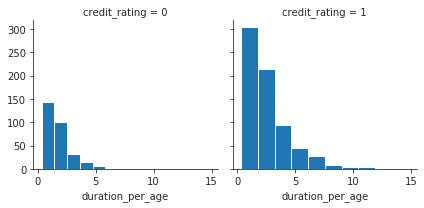

In [22]:
# Comparação dos histogramas de bons e maus credores ('duration_per_age')
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col='credit_rating', margin_titles=True)
g.map(plt.hist, 'duration_per_age')
plt.show()

<Figure size 1440x1080 with 0 Axes>

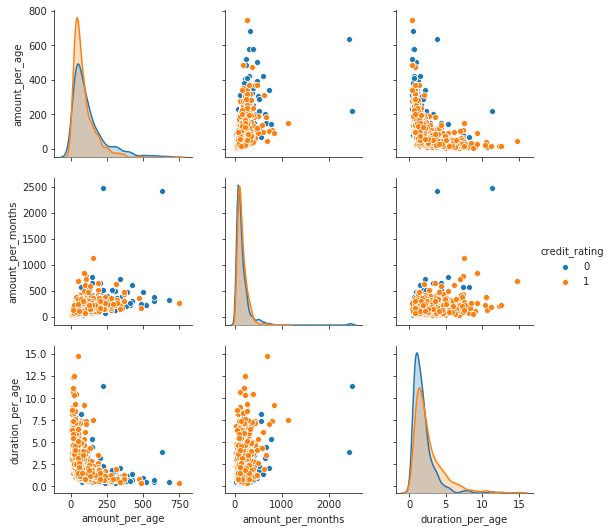

In [23]:
# Visualizando as relações entre as novas variáveis quantitativas através de gráfico dispersão
plt.figure(figsize=(20, 15))
sns.pairplot(df, vars=['amount_per_age', 'amount_per_months', 'duration_per_age'], 
             hue='credit_rating', diag_kind="kde")
plt.show()

In [24]:
# Resumo estatístico de todas as variáveis quantitativas
quantitative_cols = df[['credit_duration_months', 'credit_amount', 'age', 
                        'amount_per_months', 'amount_per_age', 'duration_per_age']]
quantitative_cols.describe()

,credit_duration_months,credit_amount,age,amount_per_months,amount_per_age,duration_per_age
count,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.24800,35.54200,167.685413,99.496231,2.409029
std,12.058814,2822.75176,11.35267,153.492003,91.260661,1.856459
min,4.000000,250.00000,19.00000,24.055556,6.097561,0.333333
25%,12.000000,1365.50000,27.00000,89.331250,40.097147,1.166667
50%,18.000000,2319.50000,33.00000,130.333333,68.626190,1.833333
75%,24.000000,3972.25000,42.00000,206.183333,128.424643,3.058333
max,72.000000,18424.00000,75.00000,2482.666667,745.380952,14.800000


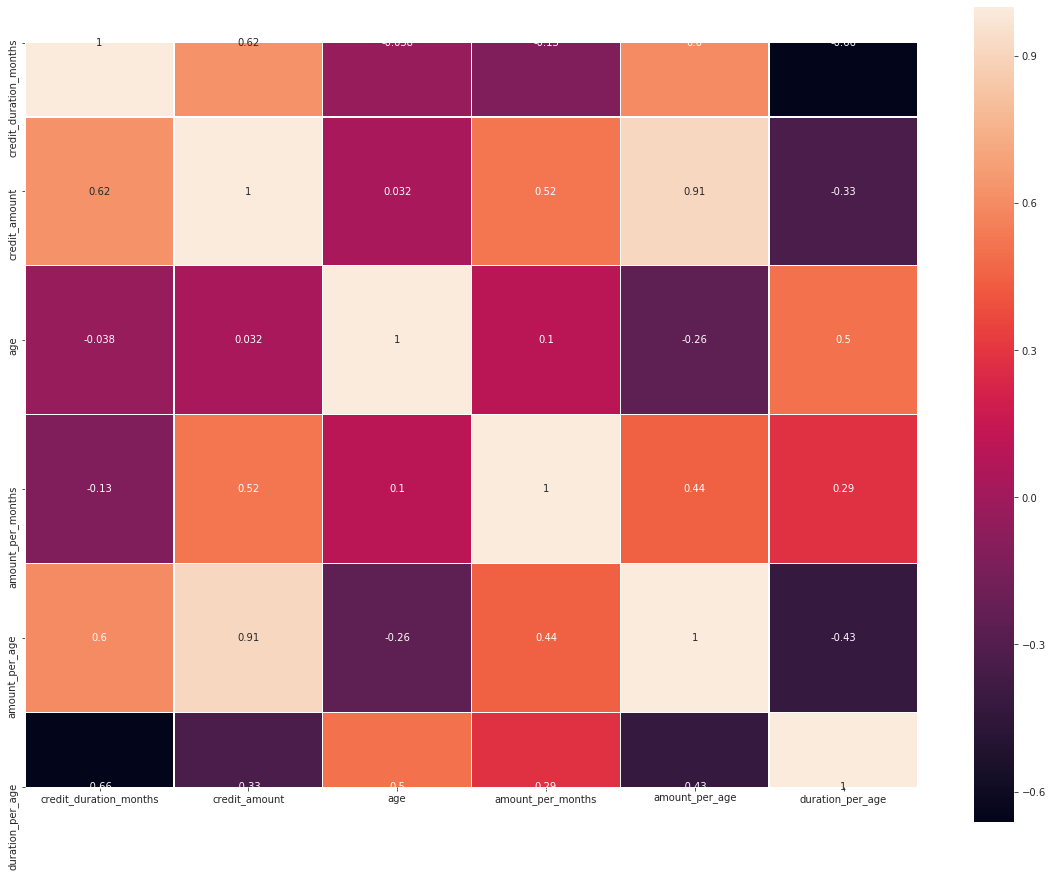

In [25]:
quantitative_vars = ['credit_duration_months', 'credit_amount', 'age', 
                     'amount_per_months', 'amount_per_age', 'duration_per_age']

plt.figure(figsize=(20, 15))
sns.heatmap(df[quantitative_vars].corr(method='pearson'), annot=True, linewidths=0.3, square=True)
plt.show()

As novas variáveis criadas também parecem apresentar um certo grau de correlação entre elas, assim como, as aprensentadas anteriormente, porém com maior intensidade. Além do mais elas são muito mais assimétricas do que as outras que foram usadas para criá-las.

Mais adiante investigaremos essa assimétria e a corrigirimos para que possamos aplicar os algoritmos de aprendizado de máquina supervisona. Porém antes disso, vamos olhar para todas as variáveis quantitativas e inspecionar se elas possuem outliers, tratar os mesmos, para que podermos ter melhores resultados nos modelos, para isso, vamos olhar os box-plots das variáveis.

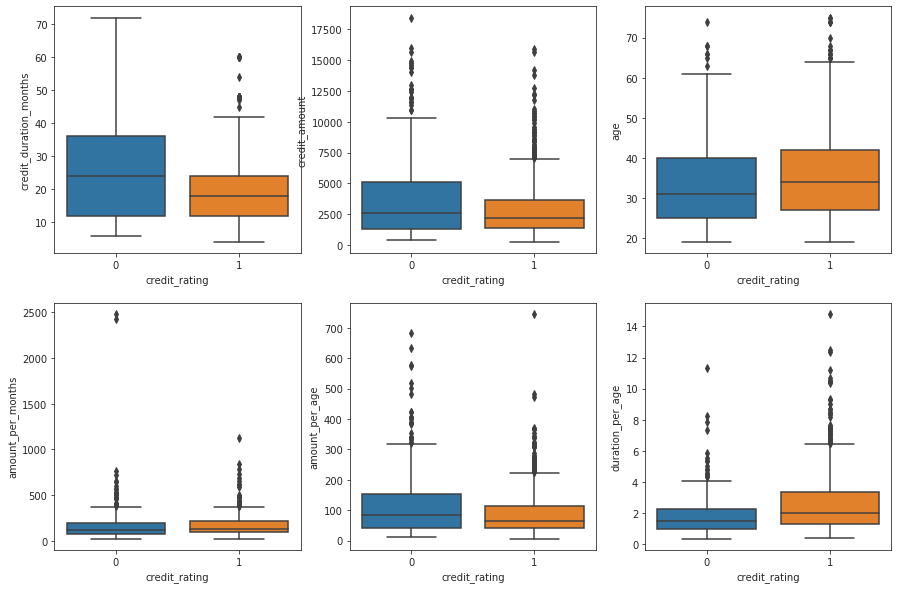

In [26]:
# Conjunto de box-plots das variáveis quantitativas
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxplot(x='credit_rating', y='credit_duration_months', data=df)

plt.subplot(2,3,2)
sns.boxplot(x='credit_rating', y='credit_amount', data=df)

plt.subplot(2,3,3)
sns.boxplot(x='credit_rating', y='age', data=df)

plt.subplot(2,3,4)
sns.boxplot(x='credit_rating', y='amount_per_months', data=df)

plt.subplot(2,3,5)
sns.boxplot(x='credit_rating', y='amount_per_age', data=df)

plt.subplot(2,3,6)
sns.boxplot(x='credit_rating', y='duration_per_age', data=df)

plt.show()

Pelos gráficos apresentados é bem visível que todos os atributos quantitativos possuem *outliers*, isso é ruim, pois quando formos treinar modelos de *machine learning*. Muitas vezes os modelos utilizados são sensiveis a *outliers* e com a presença deles o tempo de treinamento tende a ser maior, eles tendem a ser menos precisos, pois eles estão aprendendo o ruído contido nos dados, resultando em resultados ruins.

Muitas vezes os outliers tendem a serem removidos por dos dados, porém, como o dataset possui poucos dados, (apenas 1000) optei por ser parcimonioso substituir os *outliers* existentes pelo os **95º quantil** de cada variável do conjunto de dados, e assim não retirar os dados do dataset.

In [27]:
# Selecionando o 95º quantil das variáveis
upper_quantiles = df[['credit_duration_months', 'credit_amount', 'age', 
                      'amount_per_months', 'amount_per_age', 'duration_per_age']].quantile(.95)
upper_quantiles

credit_duration_months      48.000000
credit_amount             9162.700000
age                         60.000000
amount_per_months          363.573397
amount_per_age             278.647632
duration_per_age             6.166667
Name: 0.95, dtype: float64

In [28]:
# Selecionando os dados que são maiores que o 95º quantil
outliers_upper = (df[['credit_duration_months', 'credit_amount', 'age', 
                      'amount_per_months', 'amount_per_age', 'duration_per_age']] > upper_quantiles)

In [29]:
# Substituindo os outliers pelo 95º quantil de cada variável
outliers = ['credit_duration_months', 'credit_amount', 'age',
            'amount_per_months', 'amount_per_age', 'duration_per_age']

for i in outliers:
    df[outliers] = df[outliers].mask(outliers_upper, upper_quantiles, axis=1)

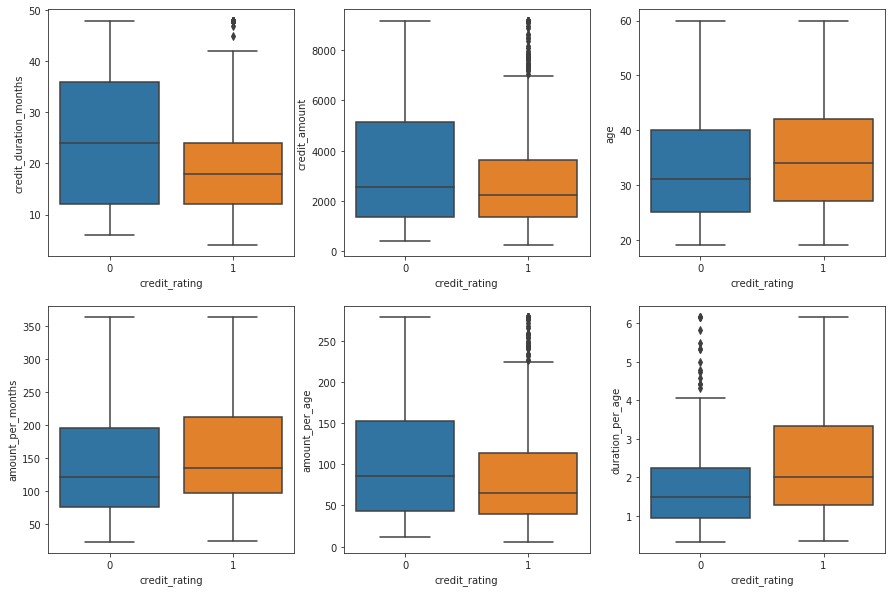

In [30]:
# Checando os box-plots dos atributos após a remoção
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.boxplot(x='credit_rating', y='credit_duration_months', data=df)

plt.subplot(2,3,2)
sns.boxplot(x='credit_rating', y='credit_amount', data=df)

plt.subplot(2,3,3)
sns.boxplot(x='credit_rating', y='age', data=df)

plt.subplot(2,3,4)
sns.boxplot(x='credit_rating', y='amount_per_months', data=df)

plt.subplot(2,3,5)
sns.boxplot(x='credit_rating', y='amount_per_age', data=df)

plt.subplot(2,3,6)
sns.boxplot(x='credit_rating', y='duration_per_age', data=df)

plt.show()

<Figure size 1440x1080 with 0 Axes>

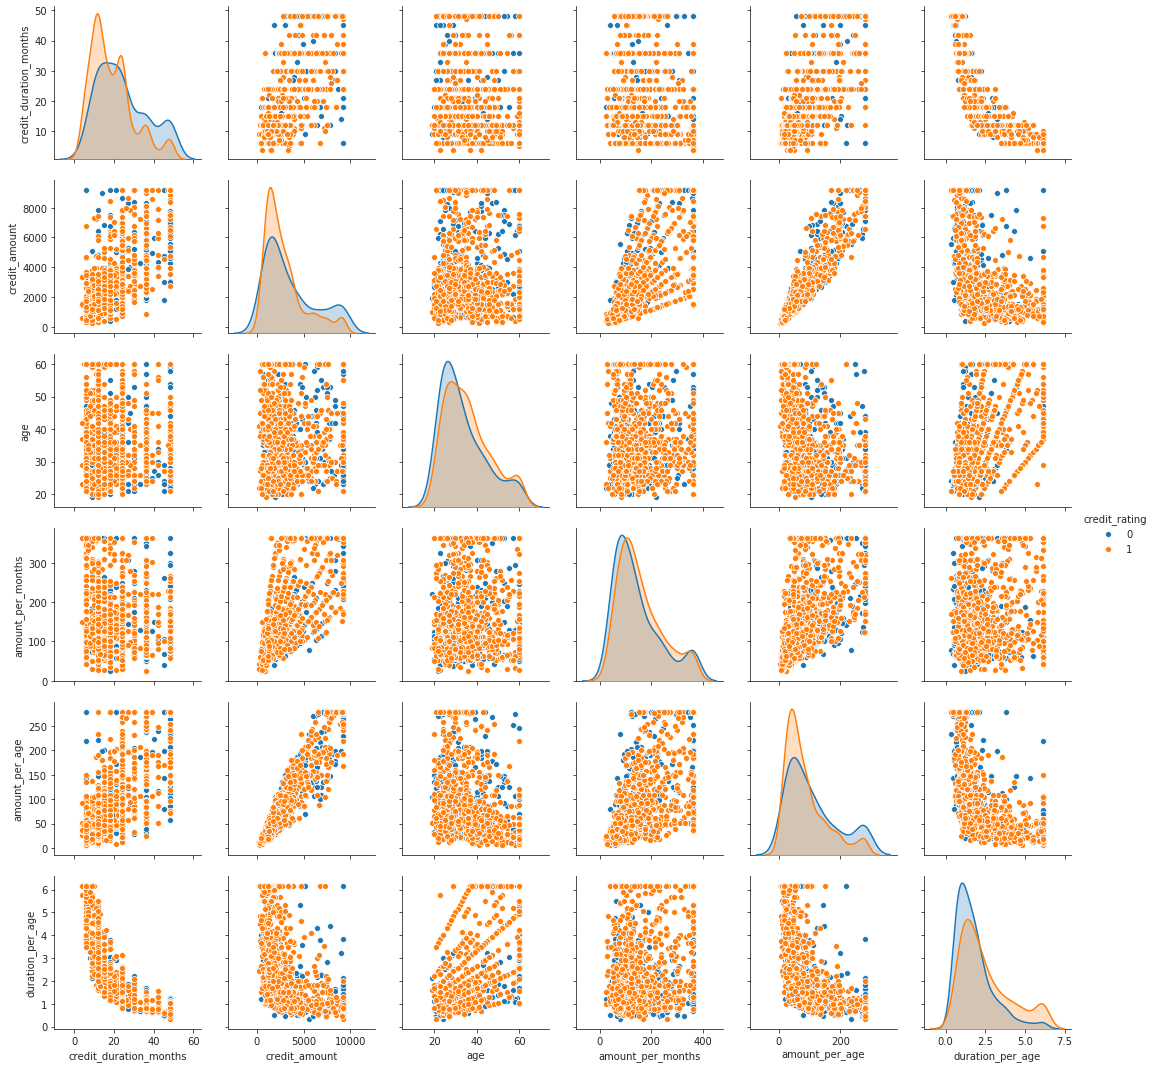

In [31]:
plt.figure(figsize=(20, 15))
sns.pairplot(df, vars=['credit_duration_months', 'credit_amount', 'age', 
                       'amount_per_months', 'amount_per_age', 'duration_per_age'], 
             hue='credit_rating', diag_kind="kde")
plt.show()

Os *outliers* presentes nas variáveis foram quase todos substítuidos, por meio do método utilizado, exato por quatro atributos, porém como disse anteriormente optei por ser parcimonioso, pelos gráficos de dispersão e possível ver que a menos *outliers* do que anteriormente.

Agora vamo partir para a análise da assimetria das variáveis quantitativas, vamos primeiro olhar para essa medida e logo após, vamos olhar para um *probplot* desses atributos para ver se os mesmos possuem uma **distribuição norma**l para que possamos aplicar os algoritmos de *machine learning*. 

In [32]:
# Assimentria das variáveis quantitativas
df[['credit_duration_months', 'credit_amount', 'age', 
   'amount_per_months', 'amount_per_age', 'duration_per_age']].skew()

credit_duration_months    0.871721
credit_amount             1.228174
age                       0.778506
amount_per_months         0.921506
amount_per_age            1.192597
duration_per_age          1.152794
dtype: float64

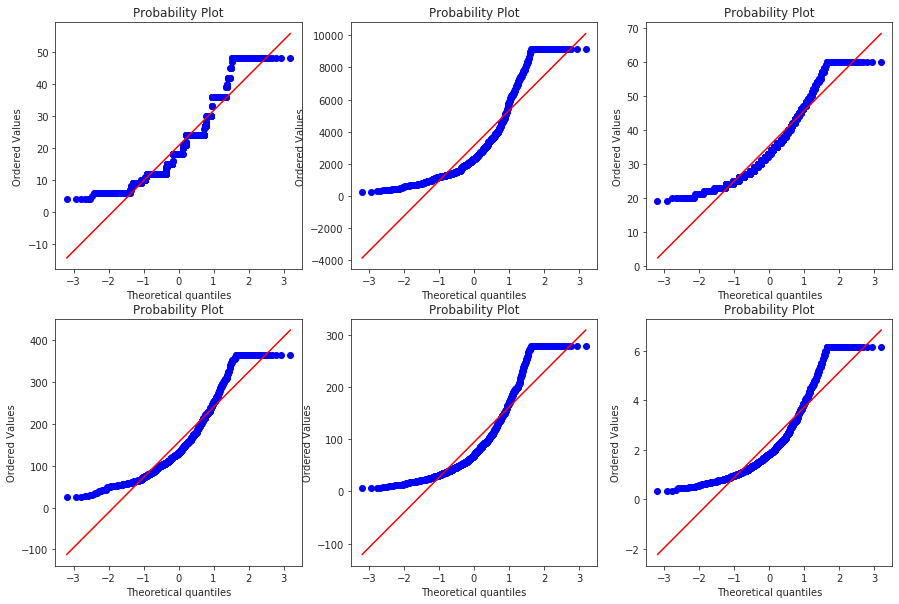

In [33]:
# Probplot das variáveis quantitativas
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
stats.probplot(df['credit_duration_months'], dist='norm', plot=plt)

plt.subplot(2,3,2)
stats.probplot(df['credit_amount'], dist='norm', plot=plt)

plt.subplot(2,3,3)
stats.probplot(df['age'], dist='norm', plot=plt)

plt.subplot(2,3,4)
stats.probplot(df['amount_per_months'], dist='norm', plot=plt)

plt.subplot(2,3,5)
stats.probplot(df['amount_per_age'], dist='norm', plot=plt)

plt.subplot(2,3,6)
stats.probplot(df['duration_per_age'], dist='norm', plot=plt)

plt.show()

Como dito anteriomente as variáveis quantittivas do dataset possuem uma **assimetria positiva** e não se adequam a **curva guassiana** algo ruim pois certos modelos de aprendizado de máquina esperam que os dados apresentados estejam normalizados. Para tanto, vamos usar o *PowerTransformer* do *Scikit Learn* para que possamos resolver este problema.

In [34]:
# Importa o PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Seleciona as variáveis quantitativas
quant_vars = ['credit_duration_months', 'credit_amount', 'age', 
              'amount_per_months', 'amount_per_age', 'duration_per_age']

# Define o transformador e seu método
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# Aplica o transformador
df_transform = pd.DataFrame(pt.fit_transform(df[quant_vars]), 
                            columns=['credit_duration_months', 'credit_amount', 'age',
                                     'amount_per_months', 'amount_per_age', 'duration_per_age'])

# Exibe o conjunto de variáveis quantitativas já transformados
df_transform.head()

,credit_duration_months,credit_amount,age,amount_per_months,amount_per_age,duration_per_age
0,-0.012012,-1.092345,-1.802477,-1.432113,-0.456412,-0.779016
1,-1.169926,0.211084,0.291781,1.512268,0.097871,1.197793
2,-0.704918,-1.384012,-1.407772,-1.124180,-0.834415,0.030835
3,-0.704918,-0.158002,0.556129,0.482704,-0.350960,0.881963
4,-0.704918,-0.127612,0.471556,0.523615,-0.290398,0.841492


Para facilitar o processo de análise as variáveis do dataset original foram divididas. Vamos juntar as variáveis preditoras e a variável target para que possamos aplicar os algoritmos.

In [35]:
# Seleciona os datasets em uma lista
frames = [dummies_vars, df_transform, df['credit_rating']]

# Concatena os mesmo pelas suas colunas
result = pd.concat(frames, axis=1)

# Monstra a forma do dataset final
print(result.shape)

(1000, 59)


In [36]:
# Mostra uma informação sobre o conjunto de dados
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 59 columns):
account_balance_1                   1000 non-null uint8
account_balance_2                   1000 non-null uint8
account_balance_3                   1000 non-null uint8
previous_credit_payment_status_1    1000 non-null uint8
previous_credit_payment_status_2    1000 non-null uint8
previous_credit_payment_status_3    1000 non-null uint8
credit_purpose_1                    1000 non-null uint8
credit_purpose_2                    1000 non-null uint8
credit_purpose_3                    1000 non-null uint8
credit_purpose_4                    1000 non-null uint8
savings_1                           1000 non-null uint8
savings_2                           1000 non-null uint8
savings_3                           1000 non-null uint8
savings_4                           1000 non-null uint8
employment_duration_1               1000 non-null uint8
employment_duration_2               1000 non-null uint

<Figure size 1440x1080 with 0 Axes>

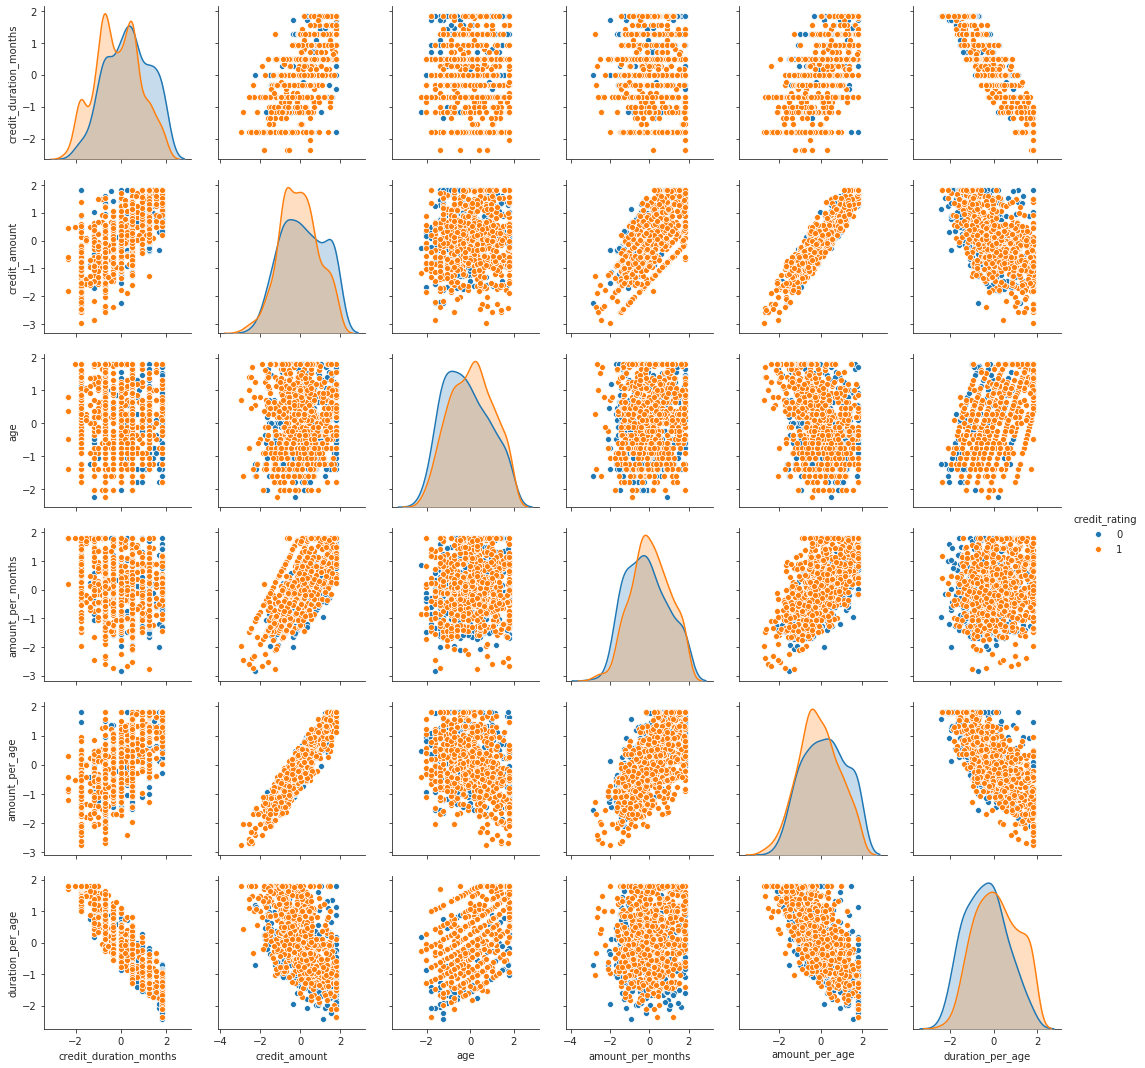

In [37]:
# Plotando um pairplot das variáveis quantitativas após a transformação
plt.figure(figsize=(20, 15))
sns.pairplot(result, vars=['credit_duration_months', 'credit_amount', 'age', 
                           'amount_per_months', 'amount_per_age', 'duration_per_age'], 
             hue='credit_rating', diag_kind="kde")
plt.show()

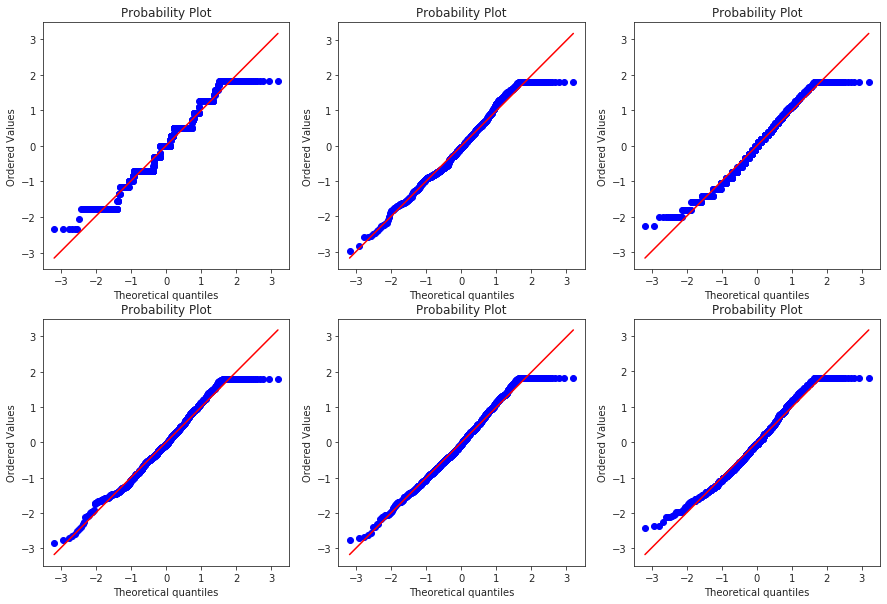

In [38]:
# Probplot das variáveis quantitativas após a transformação
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
stats.probplot(result['credit_duration_months'], dist='norm', plot=plt)

plt.subplot(2,3,2)
stats.probplot(result['credit_amount'], dist='norm', plot=plt)

plt.subplot(2,3,3)
stats.probplot(result['age'], dist='norm', plot=plt)

plt.subplot(2,3,4)
stats.probplot(result['amount_per_months'], dist='norm', plot=plt)

plt.subplot(2,3,5)
stats.probplot(result['amount_per_age'], dist='norm', plot=plt)

plt.subplot(2,3,6)
stats.probplot(result['duration_per_age'], dist='norm', plot=plt)

plt.show()

In [39]:
# Assimentria das variáveis quantitativas após a transformação Yeo-Johnson
df_transform[['credit_duration_months', 'credit_amount', 'age',
           'amount_per_months', 'amount_per_age', 'duration_per_age']].skew()

credit_duration_months   -0.011586
credit_amount            -0.001353
age                       0.048626
amount_per_months        -0.007051
amount_per_age           -0.011070
duration_per_age          0.068050
dtype: float64

As variáveis quantitativas já foram transformadas e o problema de sua assimetria já foi resolvido. A distribuição das mesmas ficou muito próxima a distribuição normal o que já um melhor cenário para a aplicação dos modelos de aprendizado de máquina.

Porém antes de treinar os modelos, resta uma coisa ser resolvida, que é, o desbalanceamento da variável alvo, `credit_rating`, como dito anteriormente se trata de um problema onde a variável preditora possui mais crédito bom do que crédito ruim no conjunto de dados, existe um certo problema a mostrar apresentar um atributo assim para um modelo de *machine learning* pois o mesmo tendenrá a aprender mais sobre os clientes que possuem bom crédito. 

Para tanto este problema pode ser corrigido por meio da técnica ***SMOTE*** do pacote ***imblearn***, mas antes de aplicar esta técnica de correção vamos separar o conjunto de dados em treino e teste pois o ***SMOTE*** só será aplicado nos dados de treinamento e não no conjunto de testes.

In [40]:
# Importa a função de divisão do dataset
from sklearn.model_selection import train_test_split

# Separa as variáveis preditoras da variável target
X = result.drop('credit_rating', axis=1)
y = result['credit_rating']

# Divide o conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [41]:
# Importa a função SMOTE
from imblearn.over_sampling import SMOTE

# Define a função
smote = SMOTE()

# Aplica o SMOTE no conjunto de treinamento
X_train_balance, y_train_balance = smote.fit_sample(X_train, y_train)

# Mostra o resultado da função
print("Before/After clean")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_balance, return_counts=True)
print(dict(zip(unique, counts)))

Before/After clean
{0: 225, 1: 525}
{0: 525, 1: 525}


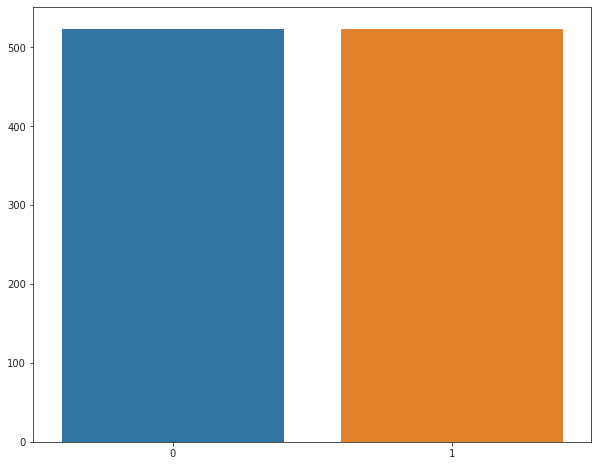

In [42]:
# Barplot da variável 'credit_rating' após a aplicação do SMOTE
plt.figure(figsize=(10, 8))
sns.barplot(x=y_train_balance.value_counts().index, 
            y=y_train_balance.value_counts().values)
plt.show()

Tudo pronto, agora podemos partir para a parte de criação e escolha dos modelos de **aprendizado de máquina**. Vamos treinar vários modelos de inicio e escolher o modelo que possui o maior ***F1 Weighted Score*** pois como possuimos um dataset com classes desbalanceadas ele o ***F1 Weighted Score*** passa a ser uma bom métrica. Em seguida, após vamos refinar o ajuste do modelo escolhido, por meio de um ***Grid Search CV***.

LDA: 0.802524 (0.128144)
Logistic Regression: 0.813439 (0.122044)
SGD Classifier: 0.773881 (0.147041)
Support Vector Classifier: 0.834783 (0.093225)
Decission Tree: 0.770994 (0.105161)
Random Forest: 0.852691 (0.087214)
Gradient Boosting: 0.831087 (0.093098)
XG Boosting: 0.824630 (0.101518)


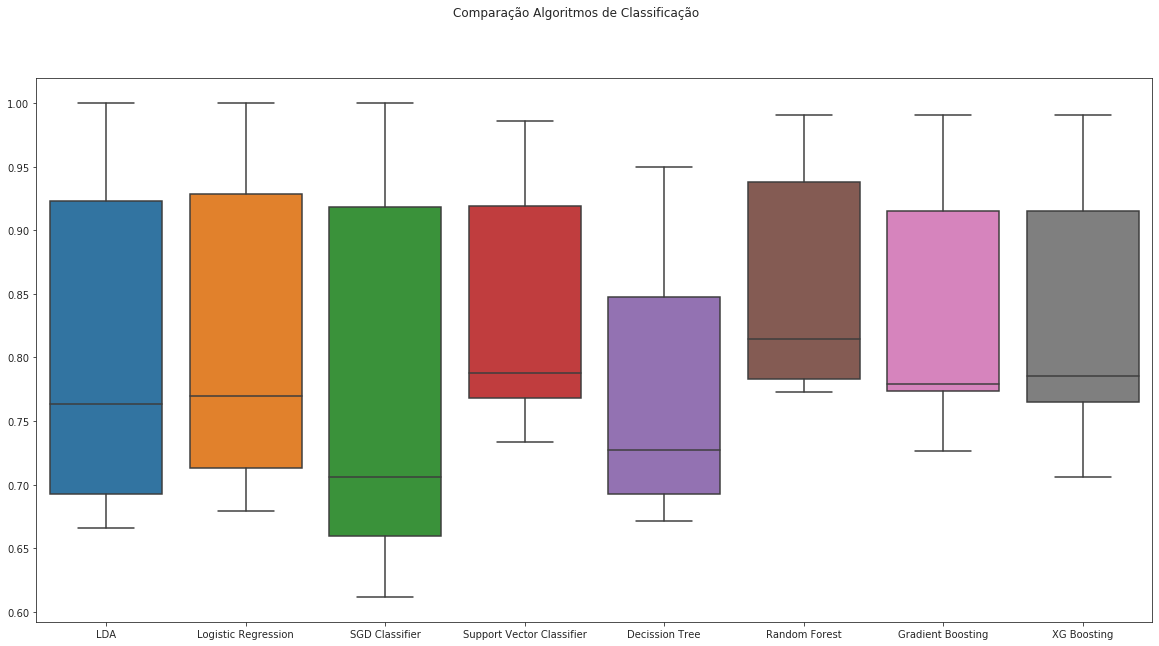

In [43]:
# Importando os modelos de machine learning utilizados
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier

# Instanciando e criando uma lista com os modelos
modelos = []
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('Logistic Regression', LogisticRegression(random_state=42)))
modelos.append(('SGD Classifier', SGDClassifier(random_state=42)))
modelos.append(('Support Vector Classifier', SVC(random_state=42)))
modelos.append(('Decission Tree', DecisionTreeClassifier(random_state=42)))
modelos.append(('Random Forest', RandomForestClassifier(random_state=42)))
modelos.append(('Gradient Boosting', GradientBoostingClassifier(random_state=42)))
modelos.append(('XG Boosting', XGBClassifier(random_state=42)))

# Lista de resultados e nomes dos modelos
resultados = []
nomes = []

# Seleção do melhor modelo por meio de uma validação cruzada
for nome, modelo in modelos:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(modelo, X_train_balance, y_train_balance, cv=kfold, scoring='f1_weighted')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = '%s: %f (%f)' % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Box-plot dos modelos
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Comparação Algoritmos de Classificação')
ax = fig.add_subplot(111)
sns.boxplot(x=nomes, y=resultados)
ax.set_xticklabels(nomes)
plt.show()

Conforme apresentado pelo gráfico anterior o modelo que apresentou o melhor desempenho foi o ***Rando Forest Classifier***. Sendo assim agora vamos otimizar este modelo, para isso vamos utilizar duas técnicas, primeiro vamos definir os hiperparâmetros a serem utilizados e depois aplicar um ***Randomized Search CV*** para escolher uma faixa de hiperparâmetros ideal, pois o, ***Grid Search CV*** é computacionalmente intensivo quando utilizado com uma faixa de hiperparâmetros muito grande, assim estariamos economizando tempo na análise.

In [44]:
# Importando o Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Definindo o Random Forest Classifier
rf_clf = RandomForestClassifier()

# Definindo os parâmetros a serem utilizados
params = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 
          'max_depth': [5, 10, 15, 20, 25], 
          'min_samples_leaf': [1, 2, 3, 4, 5], 
          'min_samples_split': [5, 10, 15, 20, 25], 
          'max_features': ['auto', 'sqrt', 'log2'], 
          'bootstrap': [True, False], 
          'oob_score': [True, False], 
          'random_state': [42]}

# Instancia o Randomized Search CV
rsearch_cv = RandomizedSearchCV(estimator=rf_clf, 
                                param_distributions=params, 
                                n_iter=100, 
                                cv=5, 
                                n_jobs=-1)
# Treinando o modelo
rsearch_cv.fit(X_train_balance, y_train_balance)

# Selecionando os melhores parâmetros
rsearch_cv.best_params_

{'random_state': 42,
 'oob_score': False,
 'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [45]:
# Importando o Grid Search CV
from sklearn.model_selection import GridSearchCV

# Definindo o Random Forest Classifier
rf_clf = RandomForestClassifier()

# Definindo os melhores parâmetros a serem utilizados
params = params = {'n_estimators': [300, 400, 500], 
                   'max_depth': [20, 25, 30], 
                   'min_samples_leaf': [2, 3, 4], 
                   'min_samples_split': [4, 5, 6], 
                   'max_features': ['auto', 'sqrt', 'log2'], 
                   'bootstrap': [False],  
                   'random_state': [42]}

# Instancia o Grid Search CV
gsearch_cv = GridSearchCV(estimator=rf_clf, 
                          param_grid=params, 
                          cv=5, 
                          scoring='f1_weighted',
                          n_jobs=-1)

# Treinando o modelo
gsearch_cv.fit(X_train_balance, y_train_balance)

# Parâmetros que retornando a melhor acurácia
print('Grid best parameter (max. Weighted F1 Score):', gsearch_cv.best_params_)

# Score do modelo
print('Best f1_weighted: ', gsearch_cv.best_score_)

Grid best parameter (max. Weighted F1 Score): {'bootstrap': False, 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 300, 'random_state': 42}
Best f1_weighted:  0.8507113933058038


Agora que sabemos o ajuste dos hiperparâmetros, podemos treinar o modelo de Floresta Aleatória e depois validado por meio da curva de validação e a curva de aprendizagem.

In [46]:
# Importando Confusion Matrix e Classification Report
from sklearn.metrics import confusion_matrix, classification_report

# Instancia o modelo Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=400, 
                                max_depth=25, 
                                min_samples_split=4, 
                                min_samples_leaf=2, 
                                max_features='log2', 
                                bootstrap=False, 
                                random_state=42)

# Treinando o modelo e aplicando o Cross Validation
rf_clf.fit(X_train_balance, y_train_balance)
pred = rf_clf.predict(X_test)
rfc_cv = cross_val_score(rf_clf, X, y, cv=5, scoring='f1_weighted')

# Definindo a Confusion Matrix e o Classification Report
conf_matrix = confusion_matrix(y_test, pred)
clf_report = classification_report(y_test, pred)

# Print dos socres do modelo
print('Confusion Matrix: Random Forest classifier\n', conf_matrix)
print('\n')
print('Classification Report: Random Forest Classifier\n', clf_report)
print('\n')
print('Mean F1 Weighted: Random Forest Classifier\n', rfc_cv.mean())

Confusion Matrix: Random Forest classifier
 [[ 47  28]
 [ 26 149]]


Classification Report: Random Forest Classifier
               precision    recall  f1-score   support

           0       0.64      0.63      0.64        75
           1       0.84      0.85      0.85       175

    accuracy                           0.78       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.78      0.78      0.78       250



Mean F1 Weighted: Random Forest Classifier
 0.7296148445430798


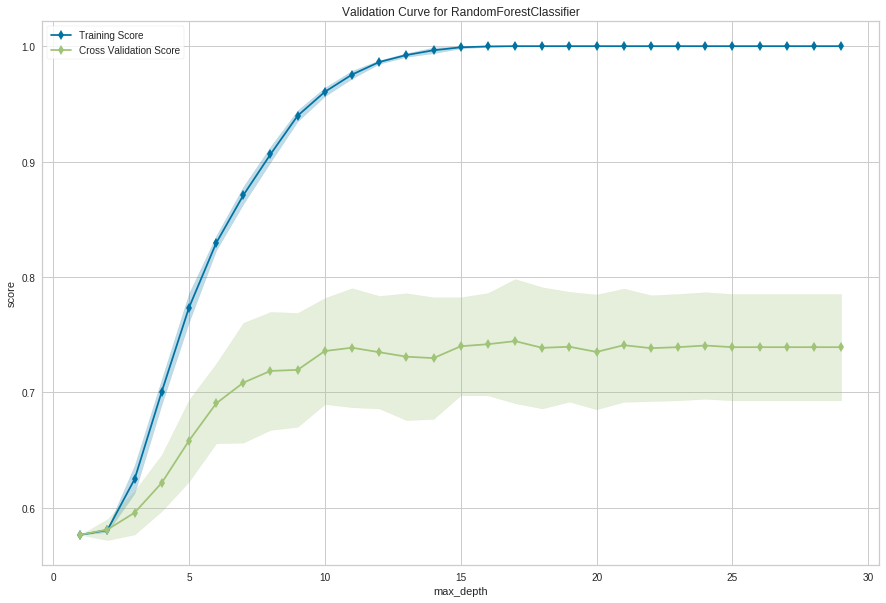

In [47]:
# Importa a função Straified KFold do sklearn e a Validation Curve do pacote Yellowbrick
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve

cv = StratifiedKFold(n_splits=10)
param_range = np.arange(1, 30, 1)


# Instancia o modelo de classificação e o visualizador
viz = ValidationCurve(rf_clf, 
                      param_name='max_depth', 
                      param_range=param_range,
                      cv=10, 
                      scoring='f1_weighted', 
                      n_jobs=-1, 
                      size=(1080, 720))

# Ajuste os dados de treinamento ao visualizador
viz.fit(X, y)

# Plota Curva de Aprendizado
viz.show()

A validação do modelo é usada para determinar a eficácia de um estimador nos dados nos quais ele foi treinado, bem como a generalização para novas entradas. O modelos possui vários hiperparâmetros e a melhor maneira de escolher uma combinação desses parâmetros é com uma pesquisa em grade. No entanto, às vezes é útil plotar a influência de um único hiperparâmetro nos dados de treinamento e teste para determinar se o estimador está com ou sem ajuste para alguns valores de hiperparâmetro.

Neste modelo é possível ver que o hiperparâmetro ***max_depth*** não obtém melhorias no ***F1 Weighted*** pelo aumento do valor do hiperparâmetro a partir de **15** o modelo atinge um determinado platô. sendo assim seria impossível obter melhoras com aumento deste hiperparâmetro.

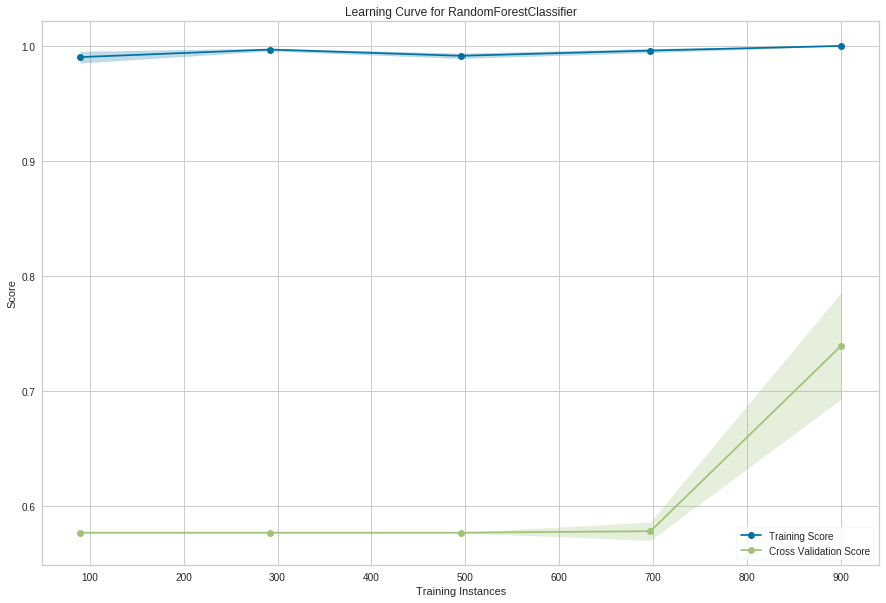

In [48]:
# Importa a função Learning Curve do pacote Yellowbrick
from yellowbrick.model_selection import LearningCurve

# Cria o visualizador da curva de aprendizado
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.1,1.0,5)

# Instancia o modelo de classificação e o visualizador
model = rf_clf
visualizer = LearningCurve(model, 
                           cv=cv, 
                           scoring='f1_weighted', 
                           train_sizes=sizes, 
                           n_jobs=-1, 
                           size=(1080, 720))

# Ajuste os dados de treinamento ao visualizador
visualizer.fit(X, y)

# Plota Curva de Aprendizado
visualizer.show()

Uma curva de aprendizado mostra a relação da pontuação do treinamento versus a pontuação do teste validado cruzado para um estimador com um número variável de amostras de treinamento. Por meio dessa curva de aprendizado e possível ver que o modelo se beneficiaria se mais dados fossem inseridos com as curvas ainda não convergiram e a curva da validação cruzada a partir de 700 passa a ter uma tendência ascendente.

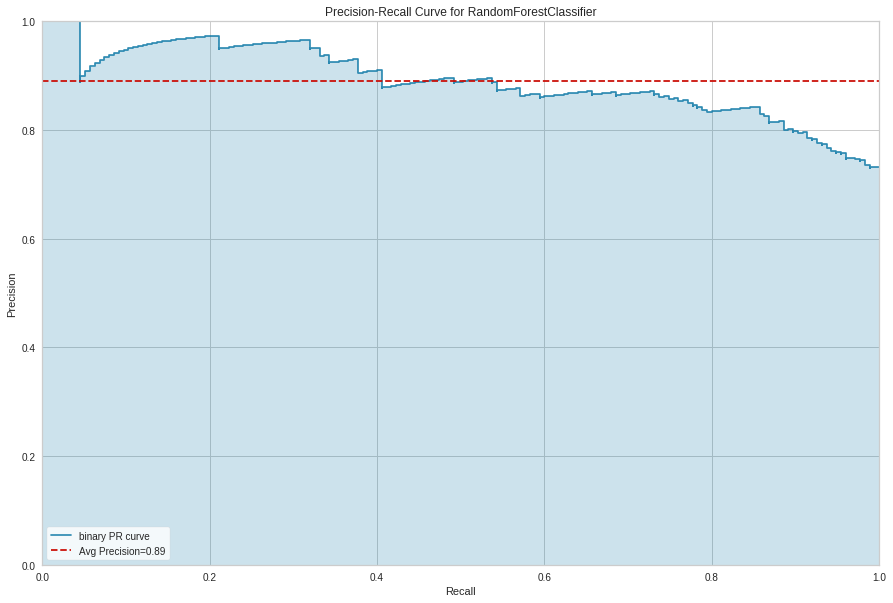

In [49]:
# Importa a função Precision-Recall Curve do pacote Yellowbrick
from yellowbrick.classifier import PrecisionRecallCurve

# Instanciando a curva de Precisão-Revocação
viz = PrecisionRecallCurve(rf_clf, size=(1080, 720))

# Ajuste os dados de treinamento ao visualizador
viz.fit(X_train_balance, y_train_balance)

# Avalie o modelo nos dados de teste
viz.score(X_test, y_test)

# Plota da curva Precisão-Revocação
viz.show()

A curva de **Precisão e Revocação** são uma boa metrica para classes desbalanceadas,ela mostra uma troca entre precisão, uma medida da relevância do resultado e revocação, uma medida de quantos resultados relevantes são retornados. 

Como o gráfico apresenta uma grande área sob a curva, isso representa uma alta recuperação e precisão, o que seria algo bom, mostrando assim que o modelo que retorna resultados precisos para a maioria das classes que seleciona.

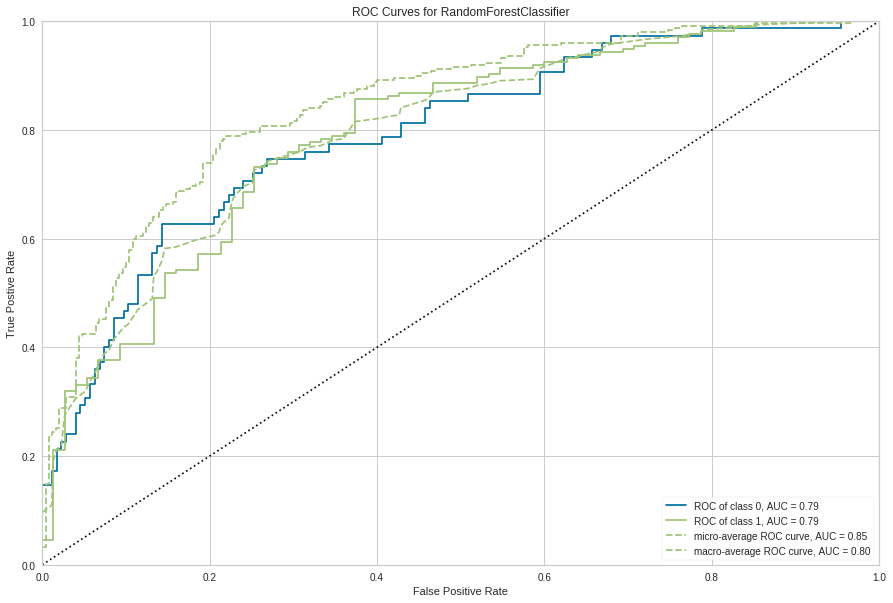

In [50]:
# Importa a função ROCAUC Curve do pacote Yellowbrick
from yellowbrick.classifier import ROCAUC

# Instanciando a curva ROCAUC
viz = ROCAUC(rf_clf, size=(1080, 720))

# Ajuste os dados de treinamento ao visualizador
viz.fit(X_train_balance, y_train_balance)

# Avalie o modelo nos dados de teste
viz.score(X_test, y_test)

# Plota da curva ROCAUC
viz.show()

Este é uma das melhores métricas quando se possuem **classes desbalanceadas**, pois ela é **incensível a classes desbalanceadas**, ela é uma medida da qualidade preditiva de um classificador que compara e visualiza a troca entre a sensibilidade e especificidade do modelo.

Quanto mais a esquerda melhor, pois, quanto mais a esquerda os falsos positivos são zero e os verdadeiros positivos são um, pois quanto maior a inclinação da curva, pois isso descreve a maximização da taxa positiva verdadeira e minimiza a taxa positiva falsa.